In [1]:
## import all the stuff I probably need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

%matplotlib inline

## Read in my data file and take a look at it
raw_data = pd.read_csv('../data/mlc_song_data.csv')
raw_data.info()
print(raw_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   If                                         98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [2]:
## I should probably clean this data up a little bit
## Maybe I can go ahead and start by changing the songwriters column from an int to a bool
## but i realize that i need to change the column name because that one is screwing me up

raw_data.columns = raw_data.columns.str.replace('\"','')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   If                                     98240 non-null   object 
 1   Country Code                           98303 non-null   object 
 2   Registrant Code                        98303 non-null   object 
 3   Year of Reference                      98239 non-null   float64
 4   Usage Period                           91898 non-null   object 
 5   Streaming Platform (DSP)               96001 non-null   object 
 6   Streams                                100000 non-null  object 
 7   Recording Artist                       100000 non-null  object 
 8   Recording Label                        98992 non-null   object 
 9   Recording Title                        100000 non-null  object 
 10  Release Title                          99931 non-null   o

In [3]:
## Now I can finally change that last column data type to boolean

## raw_data['Songwriters?'] = raw_data['Songwriters?'].astype(bool)
## raw_data.info()
## I am done worrrying about this for now

In [4]:
## lets try to change If to IRSC
## maybe there are weird spaces???
##raw_data.columns = raw_data.columns.str.replace('\t','')
##raw_data.info() #nope
raw_data.columns = raw_data.columns.str.replace('\n','')
raw_data.info() #nope

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   If                                     98240 non-null   object 
 1   Country Code                           98303 non-null   object 
 2   Registrant Code                        98303 non-null   object 
 3   Year of Reference                      98239 non-null   float64
 4   Usage Period                           91898 non-null   object 
 5   Streaming Platform (DSP)               96001 non-null   object 
 6   Streams                                100000 non-null  object 
 7   Recording Artist                       100000 non-null  object 
 8   Recording Label                        98992 non-null   object 
 9   Recording Title                        100000 non-null  object 
 10  Release Title                          99931 non-null   o

In [5]:
## Lets change some column names!!!!!!!!!!!!
raw_data = raw_data.rename(columns = {"Songwriter's Listed (1 = Yes, 0 = No)": "Songwriters", "If": "ISRC"})
raw_data.info() # I hate you If, I'll be back

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   If                            98240 non-null   object 
 1   Country Code                  98303 non-null   object 
 2   Registrant Code               98303 non-null   object 
 3   Year of Reference             98239 non-null   float64
 4   Usage Period                  91898 non-null   object 
 5   Streaming Platform (DSP)      96001 non-null   object 
 6   Streams                       100000 non-null  object 
 7   Recording Artist              100000 non-null  object 
 8   Recording Label               98992 non-null   object 
 9   Recording Title               100000 non-null  object 
 10  Release Title                 99931 non-null   object 
 11  Recording Duration (Seconds)  100000 non-null  int64  
 12  Songwriters                   100000 non-null

In [6]:
raw_data = raw_data.rename(columns = {"If": "ISRC"})
raw_data

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1


In [7]:
## Onwards and upwards to trying and find whatever I can in this data...
## tail
raw_data.tail()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1
99999,QZK6F2019397,QZ,K6F,20.0,2/1/2021,Spotify,"11,245",Lexie Liu,泥鞋（北京）文化传媒有限公司,黑洞 Metropolis,无限意识 Meta Ego,259,1


In [8]:
## lets see how many nulls are in each column
raw_data.isnull().sum() # oh crap

If                              1760
Country Code                    1697
Registrant Code                 1697
Year of Reference               1761
Usage Period                    8102
Streaming Platform (DSP)        3999
Streams                            0
Recording Artist                   0
Recording Label                 1008
Recording Title                    0
Release Title                     69
Recording Duration (Seconds)       0
Songwriters                        0
dtype: int64

why are there so many null values for "recording label" yet none for "recording artist"?

same for release title and recording title? what's going on here?

why do country code and registrant code have the same number of null values?

If has only one less null value than Year of Reference. Coincidence? I dont know

In [9]:
## let me do some sorting
raw_data.sort_values(by = ['Country Code'], ascending = True)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
53252,194923318318,19,492,33.0,1/1/2021,Spotify,"13,620",MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1
68431,195757083434,19,575,70.0,5/1/2021,Pandora,"12,160",Chris Webby,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1
77648,859726489725,85,972,64.0,4/1/2021,Pandora,"6,474",Spunkshine,Academy of Fists,Smoked,And Yet It Moves,515,0
86055,859716771427,85,971,67.0,3/1/2021,Amazon,"3,844",Bear McCreary,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0
86056,859716771427,85,971,67.0,4/1/2021,Amazon,"10,013",Various artists,Cobra Entertainment LLC,"The Marriage of Figaro, K. 92: Cherubins Song ...",100 Must-Have Lullaby Baby Classics,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82911,NaN,NaN,NaN,NaN,3/1/2021,Pandora,"14,912",Lil Durk,Alamo (Geffen Records),Switched Up,The Voice,140,0
84458,NaN,NaN,NaN,NaN,3/1/2021,Amazon,"1,331",Nipsey Hussle,Howie McDuffie Music Group,Tha Mansion,The Marahton Continues,166,0
84807,NaN,NaN,NaN,NaN,5/1/2021,Apple,"19,567",Phora,Phora LLC,the art of letting go (feat. Destiny Rogers),Heartbreak Hotel,146,0
84865,NaN,NaN,NaN,NaN,3/1/2021,Apple,"47,412",Lil Migo,Plug Brudaz Ent,The Bank Neva Closed,Voice of the Trap,200,1


what the heck is up with these numerical country codes? Lots of blanks at the end BTW

In [10]:
raw_data.value_counts()

If            Country Code  Registrant Code  Year of Reference  Usage Period  Streaming Platform (DSP)  Streams    Recording Artist  Recording Label     Recording Title                 Release Title                                         Recording Duration (Seconds)  Songwriters
TCAEA1801864  TC            AEA              18.0               3/1/2021      GTL                         1        Dj Atl Bando      Foreva100           Savage                          Trapn Da Trap, Vol. 1                                 5342                          0              7
TCAEA1801866  TC            AEA              18.0               3/1/2021      GTL                         1        Dj Atl Bando      Foreva100           Savage                          Trapn Da Trap, Vol. 1                                 5342                          0              3
USDY41966525  US            DY4              19.0               3/1/2021      GTL                         1        Dj Atl Bando      Foreva100     

In [11]:
## let's take a look at the DSP column
raw_data['Streaming Platform (DSP)'].value_counts()

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: Streaming Platform (DSP), dtype: int64

Nice tidy list; maybe we can work with a certain amount of these DSPs to make something useful of the data

In [12]:
## look at recording label column
raw_data['Recording Label'].value_counts()

Atlantic Records                      1384
Lofi Records                          1232
Warner Records                         995
Columbia                               843
Universal                              818
                                      ... 
Twenty7 Records / Human Re Sources       1
Hip-O Select / Motown                    1
NyxTheShield                             1
Relaxing Sounds For Studying             1
Universal Music Taiwan                   1
Name: Recording Label, Length: 11778, dtype: int64

In [13]:
duplicate = raw_data[raw_data.duplicated()]
duplicate = duplicate.sort_values(['Recording Title'])
duplicate.head(50)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
288,USSM12100784,US,SM1,21.0,4/1/2021,Amazon,"1,717",Jeezy,Def Jam Recordings,06 [feat. Rick Ross],TM104: The Legend of the Snowman,188,0
499,USUM72024684,US,UM7,20.0,3/1/2021,Apple,"8,318",Doa Beezy,LVTRRAW,1000 Tears,Trauma Child 2,193,1
1135,USUYG1360354,US,UYG,13.0,3/1/2021,Apple,"23,703",Agust D,Bighit Entertainment,28 (feat. NiiHWA),D-2,134,1
1237,KRA492001345,KR,A49,20.0,3/1/2021,Spotify,"29,525","Lofi Fruits Music,Orange Stick",Strange Fruits,3 AM. Gaming,3 AM. Gaming,125,0
1245,USUM72100641,US,UM7,21.0,3/1/2021,Apple,"16,607",Anuel AA,"Real Hasta La Muerte, LLC",3 de Abril,3 de Abril - Single,224,1
1695,USUG12100637,US,UG1,21.0,3/1/2021,Spotify,"49,448",LANY,LANY,4EVER!,I Loved You.,206,0
2062,CA5KR2092314,CA,5KR,20.0,3/1/2021,Spotify,"12,321",daigoro789,daigoro789,"7:00 P.M. (From ""Animal Crossing: New Leaf"")",Animal Crossing Series Piano Collections: 111 ...,109,0
2243,USSM11914257,US,SM1,19.0,3/1/2021,GTL,1,Dj Collins,St. Bess Records,90's Mixup Bangers,90 's Mixup Bangers,4258,0
2244,USSM11914257,US,SM1,19.0,3/1/2021,GTL,1,Dj Collins,St. Bess Records,90's Mixup Bangers,90 's Mixup Bangers,4258,0
2379,USUM72101210,US,UM7,21.0,3/1/2021,Apple,"51,782","Ozuna, Nicky Jam, El Alfa",El Jefe Records,A Correr los Lakers (Remix) [feat. Arcangel & ...,A Correr los Lakers (Remix) [feat. Arcangel & ...,347,1


In [14]:
raw_data.drop_duplicates()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1


Dropping duplicates does not really narrow our database all that much; only got rid of about 550 rows

In [15]:
## Lets get rid of ISRC columns to better clean and filter the main info for the recordings
song_info = raw_data[['Usage Period', 'Streaming Platform (DSP)', 'Streams', 'Recording Artist', 'Recording Label', 'Recording Title', 'Release Title', 'Recording Duration (Seconds)', 'Songwriters']]
song_info.head(20)

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,3/1/2021,Spotify,"8,133",x0o0x_,x0o0x_,______,______,142,0
6,3/1/2021,Apple,"5,839",Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1
7,2/1/2021,Amazon,"7,842",NF,NF Real Music,-Interlude-,The Search,49,0
8,3/1/2021,Spotify,"28,419",2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
9,3/1/2021,Spotify,"28,419",2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1


In [16]:
## lets try to drop some duplicates for the song info table
song_info.drop_duplicates()

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
...,...,...,...,...,...,...,...,...,...
99994,5/1/2021,Spotify,"19,726",Myuk,Sony Music Labels Inc.,魔法,魔法,232,1
99995,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1


In [17]:
song_info = song_info.drop_duplicates()
song_info.head(50)

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,3/1/2021,Spotify,"8,133",x0o0x_,x0o0x_,______,______,142,0
6,3/1/2021,Apple,"5,839",Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1
7,2/1/2021,Amazon,"7,842",NF,NF Real Music,-Interlude-,The Search,49,0
8,3/1/2021,Spotify,"28,419",2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
10,3/1/2021,Apple,"44,239",Banda Los Sebastianes,Universal Music Mexico,¡Ay Dolor!,¡Ay Dolor!,227,1


In [18]:
## find out how many of these recordings do not have songwriters
song_info['Songwriters'].value_counts()

1    50182
0    42599
Name: Songwriters, dtype: int64

Wow, pretty evenly split

In [19]:
## subset df for those that do and don't have songwriters
songwriters = song_info[song_info['Songwriters'] > 0]
songwriters.head(50)

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
6,3/1/2021,Apple,"5,839",Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1
8,3/1/2021,Spotify,"28,419",2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
10,3/1/2021,Apple,"44,239",Banda Los Sebastianes,Universal Music Mexico,¡Ay Dolor!,¡Ay Dolor!,227,1
11,1/1/2021,Spotify,"14,118",Alaina Castillo,Chosen People,¡párate!,¡párate!,154,1
12,5/1/2021,Spotify,"107,079",dodie,doddleoddle,?,Build A Problem,73,1
13,1/1/2021,Spotify,"21,467","MF DOOM,Kurious",Metalface,?,Operation: Doomsday (Complete),189,1
14,5/1/2021,Spotify,"8,822",Duelo,Fonovisa,¿Cómo Evitar?,El Amor No Acaba,209,1
15,2/1/2021,Spotify,"10,141",Jenni Rivera,Jenni Rivera Enterprises LLC,¿Cuánto Te Debo? - En Vivo Banda,La Gran Señora (En Vivo),144,1
16,3/1/2021,Apple,"19,336",Banda MS de Sergio Lizárraga,Lizos Music,¿Dónde Están?,El Trabajo Es la Suerte,168,1
17,2/1/2021,Spotify,"10,994",Yuri,Sony Music México,¿Dónde Quedo Yo?,¿Dónde Quedo Yo?,223,1


In [20]:
no_songwriters = song_info[song_info['Songwriters'] < 1]
no_songwriters.head(50)

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,3/1/2021,Spotify,"8,133",x0o0x_,x0o0x_,______,______,142,0
7,2/1/2021,Amazon,"7,842",NF,NF Real Music,-Interlude-,The Search,49,0
21,1/1/2021,Pandora,"16,935",Cultura Profética,Cultura Profética,¿Qué Será? / Ritmo Que Pesa / Suelta los Amarr...,Single::¿Qué Será? / Ritmo Que Pesa / Suelta l...,834,0
26,NaN,YouTube,"12,560",Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0
33,1/1/2021,Pandora,"11,895",Angel Vivaldi,none,. _ _ _ _,Single::. _ _ _ _,312,0


These subsets may not have a lot of value because the same song will and wont list whether is has a songwriter

In [21]:
## Convert object data type in column streams to integer
song_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92781 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Usage Period                  84679 non-null  object
 1   Streaming Platform (DSP)      88782 non-null  object
 2   Streams                       92781 non-null  object
 3   Recording Artist              92781 non-null  object
 4   Recording Label               91793 non-null  object
 5   Recording Title               92781 non-null  object
 6   Release Title                 92714 non-null  object
 7   Recording Duration (Seconds)  92781 non-null  int64 
 8   Songwriters                   92781 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 7.1+ MB


In [22]:
song_info['Streams'] = song_info['Streams'].astype('str')
song_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92781 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Usage Period                  84679 non-null  object
 1   Streaming Platform (DSP)      88782 non-null  object
 2   Streams                       92781 non-null  object
 3   Recording Artist              92781 non-null  object
 4   Recording Label               91793 non-null  object
 5   Recording Title               92781 non-null  object
 6   Release Title                 92714 non-null  object
 7   Recording Duration (Seconds)  92781 non-null  int64 
 8   Songwriters                   92781 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 7.1+ MB


In [23]:
%run genre_notebook.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123192 entries, 0 to 123191
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  123192 non-null  object
 1   value     12950 non-null   object
dtypes: object(2)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12950 entries, 0 to 123175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  12950 non-null  object
 1   value     12950 non-null  object
dtypes: object(2)
memory usage: 303.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12950 entries, 0 to 123175
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   variable  12950 non-null  object
 1   value     12950 non-null  object
dtypes: object(2)
memory usage: 303.5+ KB


In [24]:
## make the artist columns from both dfs upper so that they match
song_info['Recording Artist'] = song_info['Recording Artist'].str.upper()
song_info.head()

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,NaN,AudioMack,"10,175",FUTURE,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,2/1/2021,Trebel,5,BACHATA & MERENGUE MIX,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,NaN,AudioMack,"62,105",FOOLIO,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [25]:
genres_melt['variable'] = genres_melt['variable'].str.upper()
genres_melt.head()

,variable,value
0,THE JEFF HEALEY BAND,ROCK
1,THE JEFF HEALEY BAND,JAZZ
12,THE JEFF HEALEY BAND,BLUES
41,PIOTR ANDERSZEWSKI,CLASSICAL
70,INIGO PASCUAL,PINOY POP


In [26]:
song_genre_df = song_info.merge(genres_melt, left_on = 'Recording Artist', right_on = 'variable', how = 'left')
song_genre_df.head(60)

,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters,variable,value
0,NaN,AudioMack,"10,175",FUTURE,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,NaN,NaN
1,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,NaN,NaN
2,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,NaN,NaN
3,2/1/2021,Trebel,5,BACHATA & MERENGUE MIX,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,NaN,NaN
4,NaN,AudioMack,"62,105",FOOLIO,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,NaN,NaN
5,3/1/2021,Spotify,"8,133",X0O0X_,x0o0x_,______,______,142,0,NaN,NaN
6,3/1/2021,Apple,"5,839",QUENTIN MILLER,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1,QUENTIN MILLER,HIP HOP
7,2/1/2021,Amazon,"7,842",NF,NF Real Music,-Interlude-,The Search,49,0,NaN,NaN
8,3/1/2021,Spotify,"28,419",2WORTH,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,NaN,NaN
9,3/1/2021,Apple,"44,239",BANDA LOS SEBASTIANES,Universal Music Mexico,¡Ay Dolor!,¡Ay Dolor!,227,1,NaN,NaN


In [27]:
song_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156546 entries, 0 to 156545
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Usage Period                  143407 non-null  object
 1   Streaming Platform (DSP)      150482 non-null  object
 2   Streams                       156546 non-null  object
 3   Recording Artist              156546 non-null  object
 4   Recording Label               154564 non-null  object
 5   Recording Title               156546 non-null  object
 6   Release Title                 156402 non-null  object
 7   Recording Duration (Seconds)  156546 non-null  int64 
 8   Songwriters                   156546 non-null  int64 
 9   variable                      94468 non-null   object
 10  value                         94468 non-null   object
dtypes: int64(2), object(9)
memory usage: 14.3+ MB


In [28]:
## lets rename some more columns
song_genre_df = song_genre_df.rename(columns = {'Recording Artist': 'Artist'})
song_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156546 entries, 0 to 156545
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Usage Period                  143407 non-null  object
 1   Streaming Platform (DSP)      150482 non-null  object
 2   Streams                       156546 non-null  object
 3   Artist                        156546 non-null  object
 4   Recording Label               154564 non-null  object
 5   Recording Title               156546 non-null  object
 6   Release Title                 156402 non-null  object
 7   Recording Duration (Seconds)  156546 non-null  int64 
 8   Songwriters                   156546 non-null  int64 
 9   variable                      94468 non-null   object
 10  value                         94468 non-null   object
dtypes: int64(2), object(9)
memory usage: 14.3+ MB


In [29]:
## more renaming
song_genre_df = song_genre_df.rename(columns = {'Usage Period': 'Month'})

In [30]:
song_genre_df = song_genre_df.rename(columns = {'Streaming Platform (DSP)': 'Platform'})

In [31]:
song_genre_df = song_genre_df.rename(columns = {'Recording Label': 'Label'})

In [32]:
song_genre_df = song_genre_df.rename(columns = {'Recording Duration (Seconds)': 'Length'})

In [33]:
song_genre_df = song_genre_df.rename(columns = {'variable': 'genre_artist'})

In [34]:
song_genre_df = song_genre_df.rename(columns = {'value': 'Genre'})

In [35]:
song_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156546 entries, 0 to 156545
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Month            143407 non-null  object
 1   Platform         150482 non-null  object
 2   Streams          156546 non-null  object
 3   Artist           156546 non-null  object
 4   Label            154564 non-null  object
 5   Recording Title  156546 non-null  object
 6   Release Title    156402 non-null  object
 7   Length           156546 non-null  int64 
 8   Songwriters      156546 non-null  int64 
 9   genre_artist     94468 non-null   object
 10  Genre            94468 non-null   object
dtypes: int64(2), object(9)
memory usage: 14.3+ MB


In [36]:
##need to change stream data type to integer
song_genre_df['Streams'] = song_genre_df['Streams'].astype(str).str.strip()

In [37]:
song_genre_df['Streams'] = song_genre_df['Streams'].apply(lambda x: int(float(x.replace(',', ''))))
song_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156546 entries, 0 to 156545
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Month            143407 non-null  object
 1   Platform         150482 non-null  object
 2   Streams          156546 non-null  int64 
 3   Artist           156546 non-null  object
 4   Label            154564 non-null  object
 5   Recording Title  156546 non-null  object
 6   Release Title    156402 non-null  object
 7   Length           156546 non-null  int64 
 8   Songwriters      156546 non-null  int64 
 9   genre_artist     94468 non-null   object
 10  Genre            94468 non-null   object
dtypes: int64(3), object(8)
memory usage: 14.3+ MB


In [38]:
song_genre_df.head(60)

,Month,Platform,Streams,Artist,Label,Recording Title,Release Title,Length,Songwriters,genre_artist,Genre
0,NaN,AudioMack,10175,FUTURE,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,NaN,NaN
1,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,NaN,NaN
2,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,NaN,NaN
3,2/1/2021,Trebel,5,BACHATA & MERENGUE MIX,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,NaN,NaN
4,NaN,AudioMack,62105,FOOLIO,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,NaN,NaN
5,3/1/2021,Spotify,8133,X0O0X_,x0o0x_,______,______,142,0,NaN,NaN
6,3/1/2021,Apple,5839,QUENTIN MILLER,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1,QUENTIN MILLER,HIP HOP
7,2/1/2021,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0,NaN,NaN
8,3/1/2021,Spotify,28419,2WORTH,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,NaN,NaN
9,3/1/2021,Apple,44239,BANDA LOS SEBASTIANES,Universal Music Mexico,¡Ay Dolor!,¡Ay Dolor!,227,1,NaN,NaN


In [39]:
##convert month column to datetime data type instead of string
song_genre_df['Month'] = pd.to_datetime(song_genre_df['Month'])
song_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156546 entries, 0 to 156545
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Month            143407 non-null  datetime64[ns]
 1   Platform         150482 non-null  object        
 2   Streams          156546 non-null  int64         
 3   Artist           156546 non-null  object        
 4   Label            154564 non-null  object        
 5   Recording Title  156546 non-null  object        
 6   Release Title    156402 non-null  object        
 7   Length           156546 non-null  int64         
 8   Songwriters      156546 non-null  int64         
 9   genre_artist     94468 non-null   object        
 10  Genre            94468 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 14.3+ MB


In [40]:
song_genre_df.head(60)

,Month,Platform,Streams,Artist,Label,Recording Title,Release Title,Length,Songwriters,genre_artist,Genre
0,NaT,AudioMack,10175,FUTURE,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0,NaN,NaN
1,NaT,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0,NaN,NaN
2,NaT,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0,NaN,NaN
3,2021-02-01,Trebel,5,BACHATA & MERENGUE MIX,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0,NaN,NaN
4,NaT,AudioMack,62105,FOOLIO,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0,NaN,NaN
5,2021-03-01,Spotify,8133,X0O0X_,x0o0x_,______,______,142,0,NaN,NaN
6,2021-03-01,Apple,5839,QUENTIN MILLER,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1,QUENTIN MILLER,HIP HOP
7,2021-02-01,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0,NaN,NaN
8,2021-03-01,Spotify,28419,2WORTH,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1,NaN,NaN
9,2021-03-01,Apple,44239,BANDA LOS SEBASTIANES,Universal Music Mexico,¡Ay Dolor!,¡Ay Dolor!,227,1,NaN,NaN


In [41]:
avg_genre_length = song_genre_df.groupby('Genre')[['Length']].median().sort_values(['Length'],ascending=False)
avg_genre_length.tail(60)

,Length
Genre,
STREET PUNK,150.0
DRONE MUSIC,149.0
SKATE PUNK,149.0
BEAT,148.0
INDUSTRIAL HIP HOP,147.0
HARDCORE PUNK,147.0
LO-FI,147.0
DOOM METAL,147.0
EMO RAP,147.0


In [42]:
avg_genre_streams = song_genre_df.groupby('Genre')[['Streams']].mean().sort_values(['Streams'],ascending=False)
avg_genre_streams.head(60)

,Streams
Genre,
PIANO ROCK,1.382509e+06
SHOW TUNES,6.310134e+05
TECHNOBANDA,4.519870e+05
BRO-COUNTRY,4.226228e+05
OLD SCHOOL HIP HOP,4.109610e+05
ALTERNATIVE POP,3.550457e+05
SOUL-TRAP,3.266228e+05
VOCAL POP,2.824470e+05
SATIRICAL,2.585753e+05


In [43]:
##get some value counts of genres
song_genre_df['Genre'].value_counts()

HIP HOP                  15695
TRAP                      5319
R&B                       4225
POP                       3689
GANGSTA RAP               2249
                         ...  
PSYBIENT                     1
NATIVE AMERICAN MUSIC        1
NEW MEXICO MUSIC             1
PHONK                        1
POST-PROGRESSIVE             1
Name: Genre, Length: 992, dtype: int64

In [44]:
##maybe do a more specific value count
song_genre_df.Genre.value_counts().sort_index()

                       180
(EARLY)                  1
2-STEP                  11
A CAPPELLA              55
A-POP                    3
                      ... 
WORSHIP                 42
WORSHIP MUSIC           12
YOUTUBE VIDEO MUSIC      8
YÉ-YÉ                    1
ZYDECO                   1
Name: Genre, Length: 992, dtype: int64

In [45]:
genre_count = song_genre_df.Genre.value_counts()
genre_count.head(60)

HIP HOP                   15695
TRAP                       5319
R&B                        4225
POP                        3689
GANGSTA RAP                2249
COUNTRY                    2011
ROCK                       1853
ALTERNATIVE ROCK           1633
SOUTHERN HIP HOP           1534
POP ROCK                   1395
DRILL                      1263
EMO RAP                    1071
SOUL                       1043
FOLK                        985
INDIE ROCK                  890
HARD ROCK                   835
ELECTRONIC                  760
OBSERVATIONAL COMEDY        719
SOUNDCLOUD RAP              706
INDIE POP                   695
COUNTRY ROCK                659
ALTERNATIVE R&B             651
REGGAE                      606
SATIRE                      605
JAZZ                        600
LO-FI                       558
ALTERNATIVE HIP HOP         552
K-POP                       546
BLUES                       522
EDM                         517
CLOUD RAP                   508
CLASSICA

In [46]:
genre_count = genre_count.to_frame()
genre_count.info()
##counting how many genres I have
##I really want to group a lot of these together

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, HIP HOP to POST-PROGRESSIVE
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Genre   992 non-null    int64
dtypes: int64(1)
memory usage: 15.5+ KB


In [47]:
genre_count = genre_count.reset_index()

In [48]:
genre_count

,index,Genre
0,HIP HOP,15695
1,TRAP,5319
2,R&B,4225
3,POP,3689
4,GANGSTA RAP,2249
...,...,...
987,PSYBIENT,1
988,NATIVE AMERICAN MUSIC,1
989,NEW MEXICO MUSIC,1
990,PHONK,1


In [49]:
genre_count_length = genre_count.merge(avg_genre_length, left_on = 'index', right_on = 'Genre', how = 'left')
genre_count_length.head(60)

,index,Genre,Length
0,HIP HOP,15695,185.0
1,TRAP,5319,174.0
2,R&B,4225,197.0
3,POP,3689,198.0
4,GANGSTA RAP,2249,186.0
5,COUNTRY,2011,209.0
6,ROCK,1853,235.0
7,ALTERNATIVE ROCK,1633,215.0
8,SOUTHERN HIP HOP,1534,187.0
9,POP ROCK,1395,211.0


In [50]:
genre_cnt_len_str = genre_count_length.merge(avg_genre_streams, left_on = 'index', right_on = 'Genre', how = 'left')
genre_cnt_len_str.head(60)

,index,Genre,Length,Streams
0,HIP HOP,15695,185.0,80510.954189
1,TRAP,5319,174.0,99942.295732
2,R&B,4225,197.0,87112.285680
3,POP,3689,198.0,89337.383844
4,GANGSTA RAP,2249,186.0,91131.526901
5,COUNTRY,2011,209.0,86153.624565
6,ROCK,1853,235.0,64793.557474
7,ALTERNATIVE ROCK,1633,215.0,51116.230863
8,SOUTHERN HIP HOP,1534,187.0,58905.113429
9,POP ROCK,1395,211.0,85960.944086


In [51]:
#top_genre_cnt_len_str = genre_cnt_len_str.head()
#top_genre_cnt_len_str

In [52]:
genre_cnt_len_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    992 non-null    object 
 1   Genre    992 non-null    int64  
 2   Length   992 non-null    float64
 3   Streams  992 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 38.8+ KB


In [54]:
##rename some columns
genre_cnt_len_str = genre_cnt_len_str.rename(columns = {'Genre': 'Count', 'index': 'Genre'})
genre_cnt_len_str.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    992 non-null    object 
 1   Count    992 non-null    int64  
 2   Length   992 non-null    float64
 3   Streams  992 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 38.8+ KB


In [82]:
genre_cnt_len_str['Cnt_Str'] = genre_cnt_len_str['Count']/genre_cnt_len_str['Streams']
genre_cnt_len_str.head(25).sort_values(['Cnt_Str'], ascending = False)

,Genre,Count,Length,Streams,Cnt_Str,Str_Cnt
0,HIP HOP,15695,185.0,80510.954189,0.194942,5.129720
1,TRAP,5319,174.0,99942.295732,0.053221,18.789678
2,R&B,4225,197.0,87112.285680,0.048501,20.618292
3,POP,3689,198.0,89337.383844,0.041293,24.217236
17,OBSERVATIONAL COMEDY,719,236.0,20667.617524,0.034789,28.744948
7,ALTERNATIVE ROCK,1633,215.0,51116.230863,0.031947,31.302040
23,SATIRE,605,227.0,19012.507438,0.031821,31.425632
6,ROCK,1853,235.0,64793.557474,0.028599,34.966842
8,SOUTHERN HIP HOP,1534,187.0,58905.113429,0.026042,38.399683
15,HARD ROCK,835,239.0,33030.942515,0.025279,39.558015


In [78]:
genre_cnt_len_str['Str_Cnt'] = genre_cnt_len_str['Streams']/genre_cnt_len_str['Count']
top_genre_str_cnt = genre_cnt_len_str.head(25).sort_values(['Str_Cnt'], ascending = False)

<AxesSubplot:xlabel='Length', ylabel='Str_Cnt'>

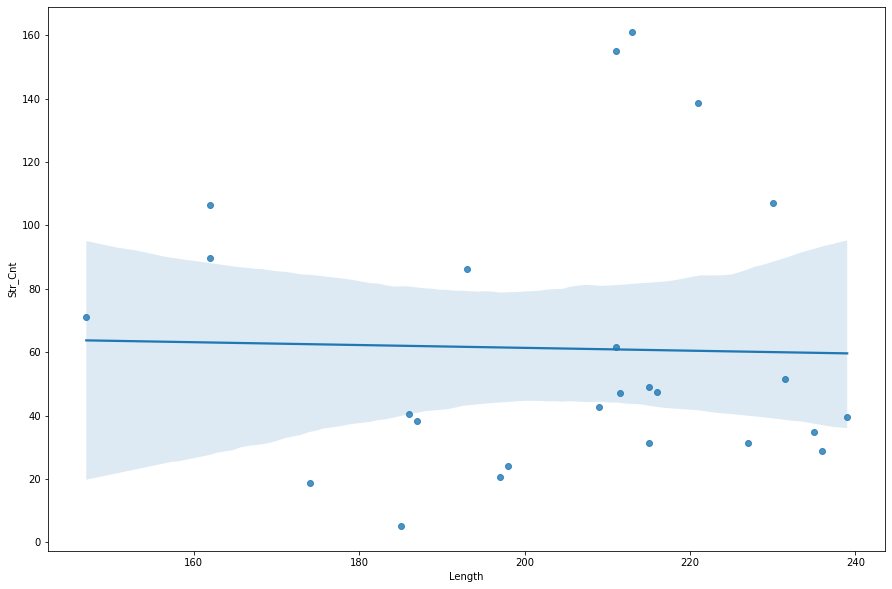

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.figure(figsize=(10,8))
#plt.scatter('Length', 'Streams', data = top_genre_str_cnt)
#m, b = np.polyfit('Length', 'Streams', 1)
#plt.plot('Length', m*'Length'+b)
#plt.xlabel('AVG Song Duration')
#plt.ylabel('Total Streams of Genre')

import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
sns.regplot(x='Length', y='Str_Cnt', data = top_genre_str_cnt)

In [ ]:
import seaborn as sns, numpy as np
from ipywidgets import interact, FloatSlider
from matplotlib import rcParams
#rcParams['figure.figsize'] = 15,15
data = top_genre_cnt_len_str.sort_values('Length', ascending = False)
#plt.barh('Genre', 'Length', data = data)
#plt.xlabel('Duration (seconds)', fontweight = 'bold', size = 24)
#plt.ylabel('Genre', size = 24, fontweight = 'bold')
#plt.xticks(size = 16)
#plt.yticks(size = 16)
#plt.title('AVG Duration of Top 50 Genres', size = 24, fontweight = 'bold')

rcParams['figure.figsize'] = 15,15
sns.set(font_scale = 2)
duration_hbar = sns.barplot(x='Length', y='Genre', data=data, palette='Blues_r')
duration_hbar.set_xlim(0, 270)
duration_hbar.set(xlabel=None)
duration_hbar.set(xticklabels=[])
duration_hbar.set(ylabel=None)
duration_hbar.bar_label(duration_hbar.containers[0], padding=5)

In [ ]:
data = top_genre_cnt_len_str.sort_values('Streams', ascending = False)
#plt.figure(figsize=(15,15))
#plt.barh('Genre', 'Length', data = data, color = 'gold')
#plt.xlabel('Duration (seconds)', fontweight = 'bold', size = 24)
#plt.xticks(size = 16)
#plt.yticks(size = 16)
#plt.title('AVG Duration Sorted by # of Songs', size = 24, fontweight = 'bold')

rcParams['figure.figsize'] = 15,15
sns.set(font_scale = 2)
duration_hbar = sns.barplot(x='Length', y='Genre', data=data, palette='Wistia')
duration_hbar.set_xlim(0, 270)
duration_hbar.set(xlabel=None)
duration_hbar.set(xticklabels=[])
duration_hbar.set(ylabel=None)
duration_hbar.bar_label(duration_hbar.containers[0], padding=5)

In [ ]:
plt.hist('Length', bins = 5, data = data)
plt.show()

In [ ]:
from matplotlib import rcParams
rcParams[‘figure.figsize’] = 15,10